# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


In [1]:
id1 = "206239568"
id2 = "207330176"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

Uncomment in case two students are doing the assignment together:

In [3]:
df = pd.DataFrame([id1,id2])

In [4]:
df.to_clipboard(index=False,header=False)

---

----

In [5]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/avocado.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
total_sold      float64
small_sold      float64
large_sold      float64
sma             float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Q1 
Show how much avacados sold in every region each year.

In [7]:
data["Date"] = pd.to_datetime(data['Date'])
data["year"] = pd.DatetimeIndex(data["Date"]).year
data_1 = data.groupby(["year","region"])["total_sold"].sum()
data_1 = pd.DataFrame(data_1)
display(data_1)

total_sold
year region                           
2015 Albany               4.029896e+06
     Atlanta              2.323170e+07
     BaltimoreWashington  4.064558e+07
     Boise                3.784357e+06
     Boston               2.745499e+07
...                                ...
2018 Syracuse             1.046988e+06
     Tampa                6.642055e+06
     TotalUS              5.236323e+08
     West                 9.247709e+07
     WestTexNewMexico     1.180082e+07

[216 rows x 1 columns]

# Q2
Create a new DataFrame which contains only a region starts with the first latter of your name and the year 2016.
We chose the region "Denver".

In [8]:
data[data['region'].str.contains('De')]

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
624,0,2015-12-27,0.98,625475.10,93034.20,246747.13,19103.69,266590.08,38620.02,227884.21,85.85,conventional,2015,Denver
625,1,2015-12-20,1.05,528944.54,113403.55,188263.20,24477.83,202799.96,34993.02,167806.94,0.00,conventional,2015,Denver
626,2,2015-12-13,0.83,741702.50,96222.34,321764.32,29349.34,294366.50,34244.40,260040.92,81.18,conventional,2015,Denver
627,3,2015-06-12,0.76,838225.19,111259.34,378124.28,8807.96,340033.61,35086.04,304844.07,103.50,conventional,2015,Denver
628,4,2015-11-29,1.12,429109.64,85241.45,179982.42,14146.28,149739.49,31920.41,117819.08,0.00,conventional,2015,Denver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17764,7,2018-04-02,1.32,17541.66,580.19,2434.85,0.00,14480.83,13820.72,660.11,0.00,organic,2018,Detroit
17765,8,2018-01-28,1.29,20073.36,738.01,3026.96,0.00,16298.93,12972.63,3326.30,0.00,organic,2018,Detroit
17766,9,2018-01-21,1.41,22121.43,826.25,3379.62,0.00,17890.60,11215.49,6675.11,0.00,organic,2018,Detroit
17767,10,2018-01-14,1.32,20636.96,750.22,3266.56,0.00,16598.98,15422.79,1176.19,0.00,organic,2018,Detroit


In [9]:
data_2 = data.loc[(data.region == "Denver")]
data_2 = data_2.loc[(data.year == 2016)]
print("Our DataFrame has "+str(len(data_2))+" rows.")

Our DataFrame has 104 rows.


# Q3
Whats the mean sales on the new DataFrame (data_2)

In [10]:
avg_sales = data_2["total_sold"].mean()
print("The avarage sales of our DataFrame is "+str(avg_sales))

The avarage sales of our DataFrame is 435651.5581730769


# Q4
Show the amount of avocado bags sold in september in that DataFrame.

In [11]:
data_2["month"] = pd.DatetimeIndex(data_2["Date"]).month


data_3 = data_2.groupby("month").sum()
data_3 = data_3.reset_index()
total_bags_sep = int(data_3["Total Bags"][data_3["month"]==9])
print(str(total_bags_sep)+" bags have been sold in september in our DataFrame.")

1140308 bags have been sold in september in our DataFrame.


# Q5
Create a visualization to compare total_sold column and types column.

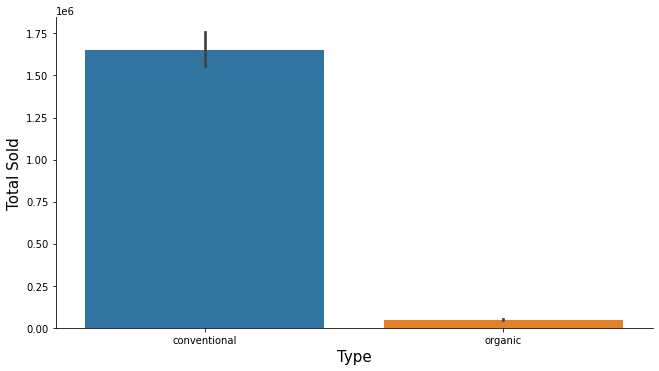

In [12]:
sns.catplot(data=data, kind="bar", x="type", y="total_sold",height=5,aspect=1.8)
plt.xlabel("Type",fontsize=15)
plt.ylabel("Total Sold",fontsize=15)
plt.show()

# Q6

show the correlation for the columns ['total_sold', 'Total Bags', 'AveragePrice', 'type'], handle with the column 'type' before you show the correlation.

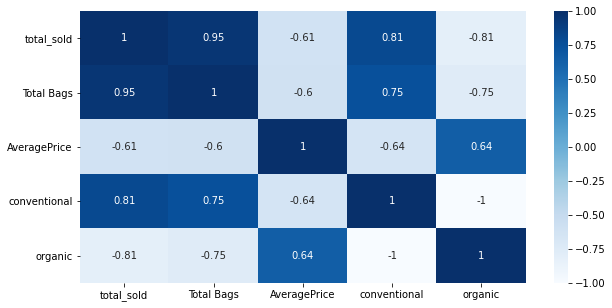

In [13]:
features = ['total_sold', 'Total Bags', 'AveragePrice', 'type']

data_6 = data[features]
data_6_dummies = pd.get_dummies(data_6['type'])
data_6 = pd.concat([data_6, data_6_dummies], axis=1)
corr_df = data_6.corr(method='spearman')
plt.figure(figsize = (10,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(data=corr_df,cmap='Blues', annot=True)
plt.show()


# Q7
Create a scatterplot for the strongest correlation with a color(hue) for each year.

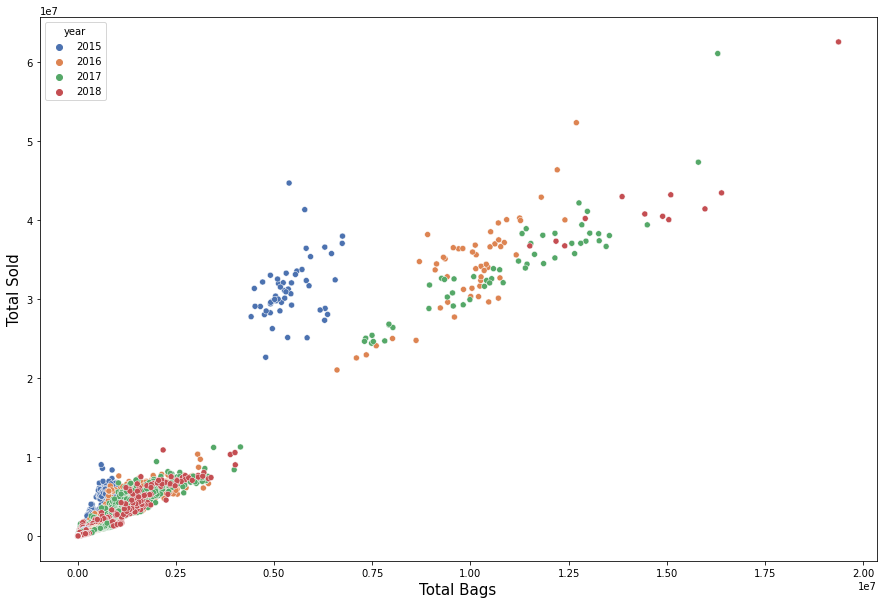

In [14]:

fig, axes = plt.subplots(figsize=(15, 10))
corr_tuples = corr_df.unstack().sort_values()[-6:-5]
corr_tuples = pd.Series.keys(corr_tuples)
sns.scatterplot(data=data, x=corr_tuples[0][1], y=corr_tuples[0][0],hue="year",palette="deep")
plt.xlabel("Total Bags",fontsize=15)
plt.ylabel("Total Sold",fontsize=15)
plt.show()

---
# GOOD LUCK !!!!
---

Extra Questions:

In [15]:
# df["column"].fillna(df["column"].mean())

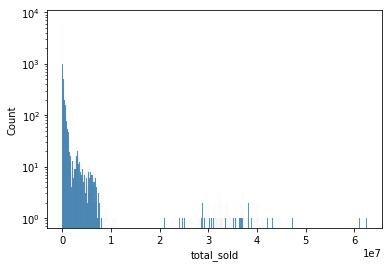

In [16]:
temp_df = data["total_sold"]
sns.histplot(data=temp_df)
plt.yscale('log')
plt.show()

In [17]:
data_temp = data[["AveragePrice","type","year"]]
data_temp = data.pivot_table(columns=["type","year"],values="AveragePrice",aggfunc='mean')
data_temp

type         conventional                                 organic            \
year                 2015      2016      2017      2018      2015      2016   
AveragePrice     1.077963  1.105595  1.294888  1.127886  1.673324  1.571684   

type                              
year              2017      2018  
AveragePrice  1.735521  1.567176

In [18]:
data_temp = data.groupby(["type","year"])["AveragePrice"].mean()
data_temp = pd.DataFrame(data_temp)
display(data_temp)

AveragePrice
type         year              
conventional 2015      1.077963
             2016      1.105595
             2017      1.294888
             2018      1.127886
organic      2015      1.673324
             2016      1.571684
             2017      1.735521
             2018      1.567176

In [28]:
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error



features = ['region', 'type', 'AveragePrice', 'Total Bags']
x = pd.get_dummies(data[features])
y = data['total_sold']


x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x,y,test_size=0.3,random_state=42)
model1 = sk.tree.DecisionTreeRegressor(random_state=42)
model1 = model1.fit(x_train,y_train)
def eval(x,y,model):
    pred=model.predict(x)
    print("The MSE is "+str(mean_squared_error(y,pred,squared=False)))

    
eval(x_test,y_test,model1)


The MSE is 497209.01247062034
